### Imports

In [1]:
import pyforest
from scipy.stats import chi2_contingency

### Loading the data

In [2]:
data = pd.read_csv("car_price_prediction[1].csv")

<IPython.core.display.Javascript object>

In [3]:
data.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [4]:
i = np.random.randint(1,5)
data.sample(i)

<IPython.core.display.Javascript object>

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
1757,45715081,19757,779,TOYOTA,Camry Se,2013,Sedan,Yes,Petrol,2.5,124000 km,4.0,Tiptronic,Front,04-May,Left wheel,Black,6


In [5]:
print("The data's shape is {}".format(data.shape))

The data's shape is (19237, 18)


### Null values

In [6]:
data.info()

# There are no Null Values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

### Dropping columns 

In [7]:
# Levy column is suspicious 
# There are no null values but "-" as a value replacing the NaN values

# Finding the % 

data['Levy'].value_counts()*100/data.shape[0]
# 30% is a lot hence these rows cannot be dropped but dropping the column instead

Levy
-       30.248999
765      2.526381
891      2.396424
639      2.131309
640      2.105318
          ...    
3156     0.005198
2908     0.005198
1279     0.005198
1719     0.005198
1901     0.005198
Name: count, Length: 559, dtype: float64

In [8]:
data.drop(['ID','Levy'],axis=1,inplace=True)

### Sanity Checks

In [9]:
data.head()

,Price,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,13328,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,16621,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,8467,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,3607,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,11726,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


### Looking at the dtypes of these columns :

1. Engine volume

2. Mileage 

###### These columns are having wrong dtypes

In [10]:
print("The column Engine volume contains value like {} which should be a float value".format(data['Engine volume'][i]))

The column Engine volume contains value like 3 which should be a float value


In [11]:
# Look at the values in the column

data['Engine volume'].value_counts()

# There are values with text Turbo making it an Object

Engine volume
2            3916
2.5          2277
1.8          1760
1.6          1462
1.5          1321
             ... 
6.8             1
6.7             1
3.1             1
0.8 Turbo       1
1.1 Turbo       1
Name: count, Length: 107, dtype: int64

In [12]:
turbo_cars = data[data['Engine volume'].str.contains('Turbo')]
turbo_cars['Manufacturer']

# These values cannot be dropped and should not be as luxury cars have turbos by dropping them it will impact further 

23                FORD
25       MERCEDES-BENZ
30       MERCEDES-BENZ
34                JEEP
42          VOLKSWAGEN
             ...      
19170    MERCEDES-BENZ
19190              BMW
19200    MERCEDES-BENZ
19225             OPEL
19232    MERCEDES-BENZ
Name: Manufacturer, Length: 1931, dtype: object

In [13]:
# Since we want to have this data of the car being a turbo powered car also make the column a numeric column 

data['Turbo_charged'] = data['Manufacturer'].str.contains('Turbo').astype(int)

# By doing this we created a column that will be a binary column that will keep the data saved for car being turbo or not

data.head()

,Price,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Turbo_charged
0,13328,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12,0
1,16621,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8,0
2,8467,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2,0
3,3607,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0,0
4,11726,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4,0


In [14]:
# Secondly, we need to handle the rows that have turbo in it

data['Engine volume'] = data['Engine volume'].str.replace('Turbo', '').astype(float)

In [15]:
data.head()

,Price,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Turbo_charged
0,13328,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12,0
1,16621,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3.0,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8,0
2,8467,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2,0
3,3607,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0,0
4,11726,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4,0


### Handling Errors

In [16]:
# Mileage Column

data['Mileage'].dtype

dtype('O')

In [17]:
# The column Mileage has text 'km' making it an object column

data['Mileage'] = data['Mileage'].str.replace('km','').astype(int)

In [18]:
# To prevent forgetting the unit of the column Mileage 

data.rename(columns={'Mileage': 'Mileage_km'},inplace=True)

In [19]:
data.head()

,Price,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage_km,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Turbo_charged
0,13328,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005,6.0,Automatic,4x4,04-May,Left wheel,Silver,12,0
1,16621,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3.0,192000,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8,0
2,8467,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000,4.0,Variator,Front,04-May,Right-hand drive,Black,2,0
3,3607,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966,4.0,Automatic,4x4,04-May,Left wheel,White,0,0
4,11726,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901,4.0,Automatic,Front,04-May,Left wheel,Silver,4,0


In [20]:
# The door columns has an error 

data['Doors'][i]

'04-May'

In [21]:
data['Doors'] = data['Doors'].str.split('-').str[0]

In [22]:
data['Doors'].dtype

# Its still an Object

dtype('O')

In [23]:
data['Doors'].value_counts()

Doors
04    18332
02      777
>5      128
Name: count, dtype: int64

In [24]:
data['Doors'] = data['Doors'].str.replace('>','').astype(int)

In [25]:
data['Doors'].value_counts()

Doors
4    18332
2      777
5      128
Name: count, dtype: int64

In [26]:
data.head()

,Price,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage_km,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Turbo_charged
0,13328,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005,6.0,Automatic,4x4,4,Left wheel,Silver,12,0
1,16621,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3.0,192000,6.0,Tiptronic,4x4,4,Left wheel,Black,8,0
2,8467,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000,4.0,Variator,Front,4,Right-hand drive,Black,2,0
3,3607,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966,4.0,Automatic,4x4,4,Left wheel,White,0,0
4,11726,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901,4.0,Automatic,Front,4,Left wheel,Silver,4,0


### Data Visualization

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

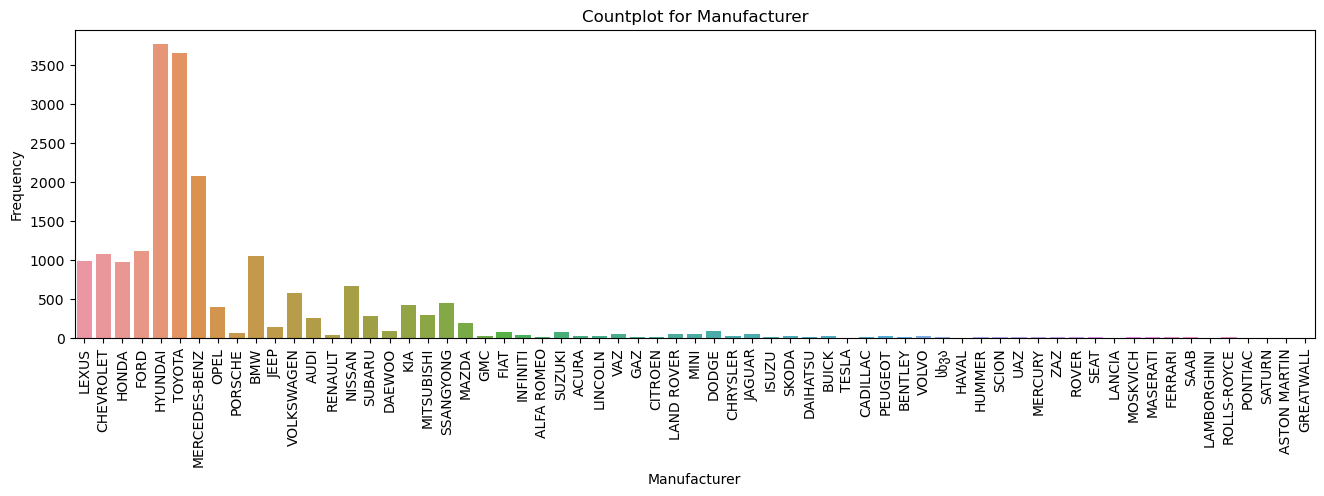

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

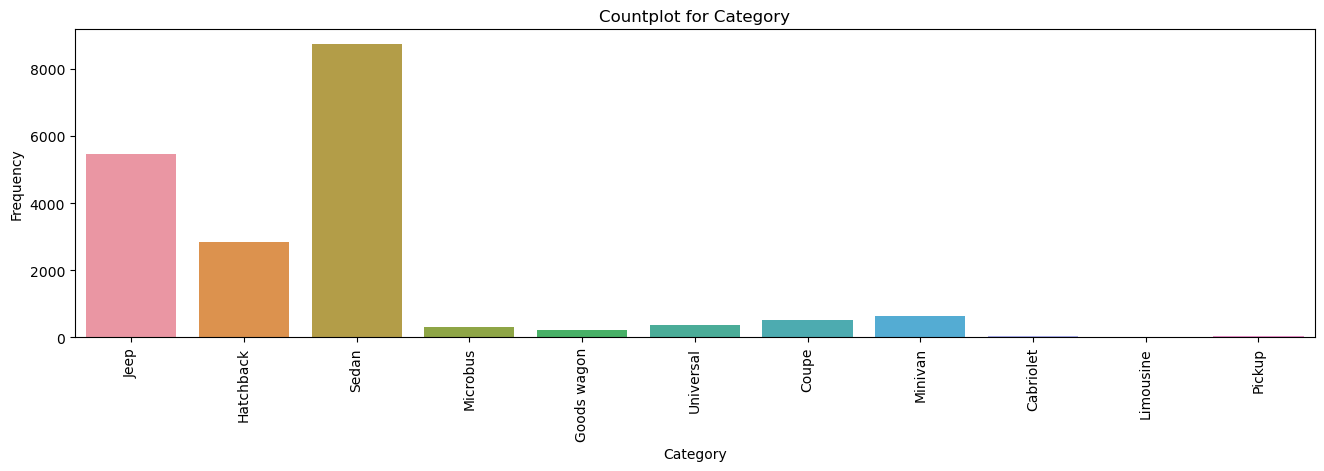

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

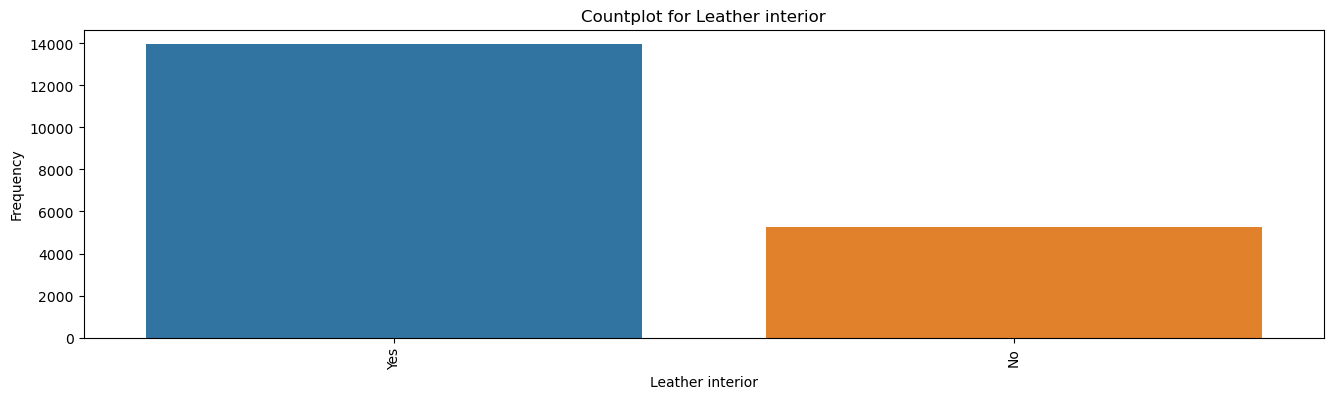

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

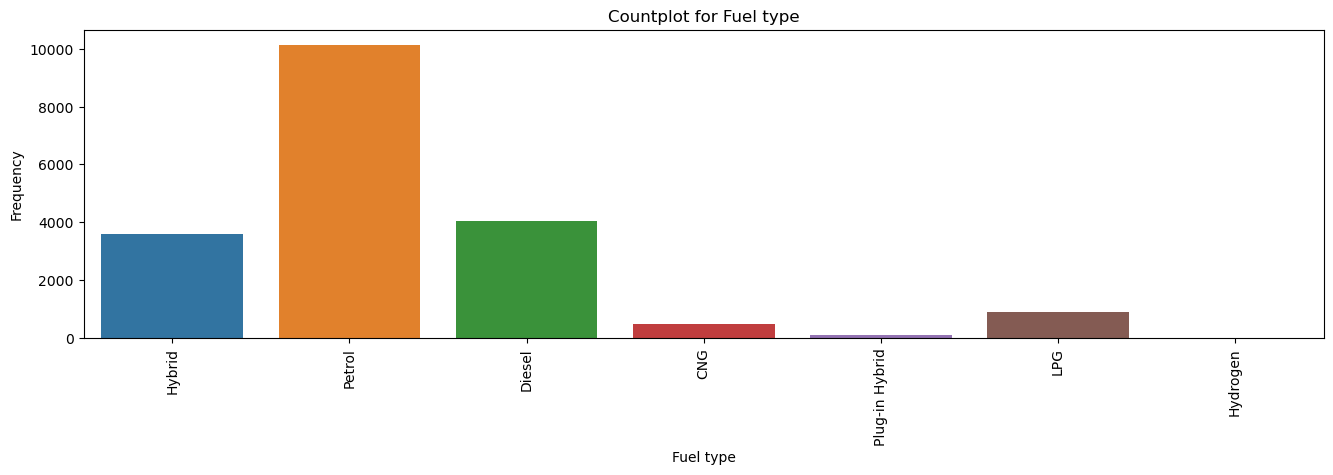

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

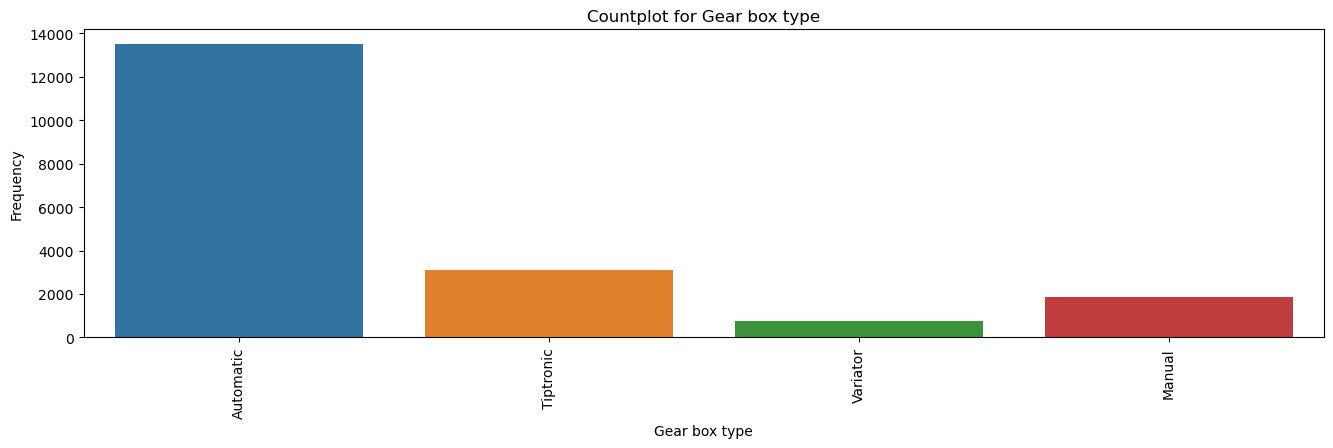

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

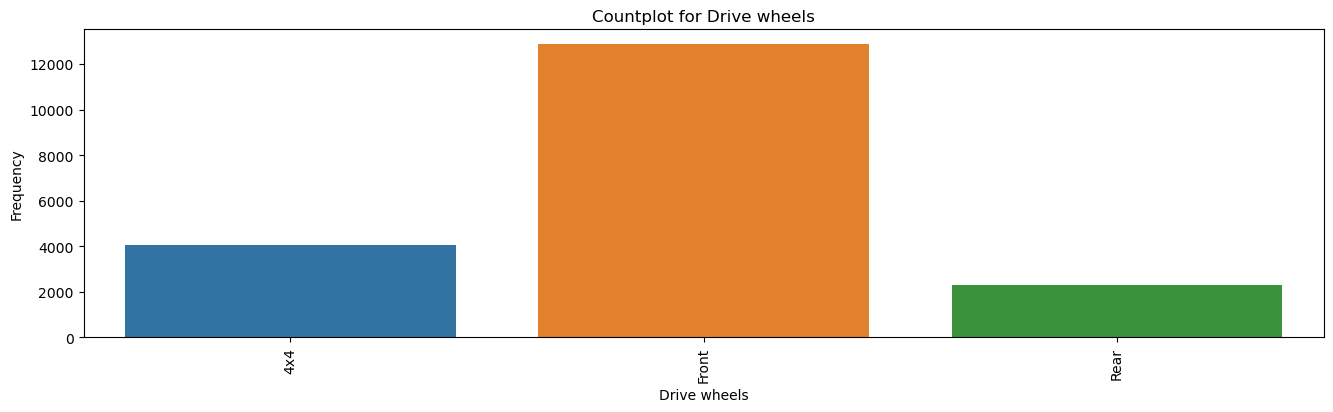

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

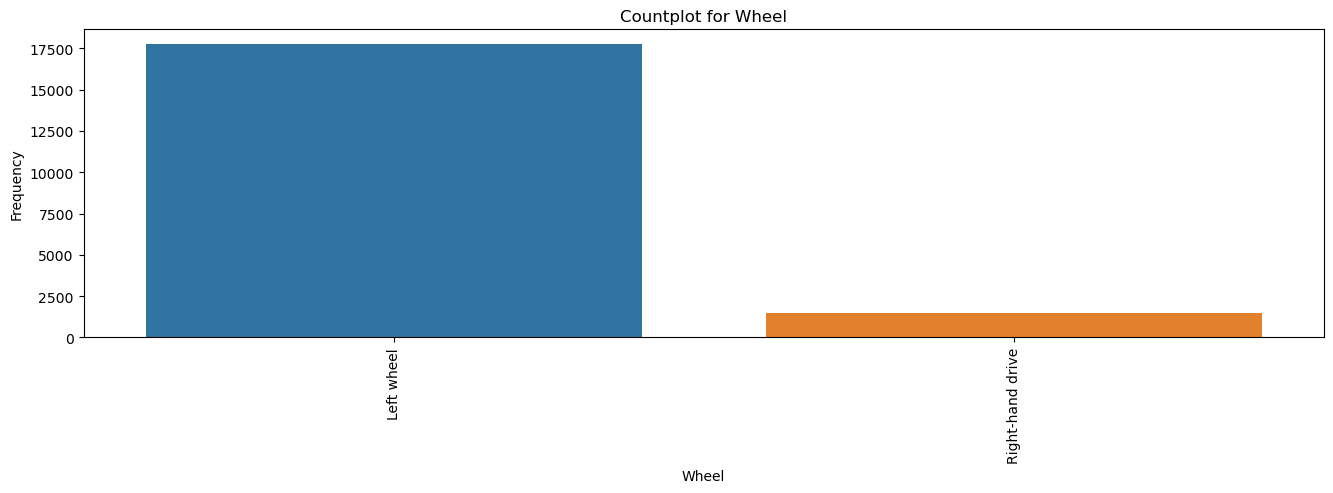

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

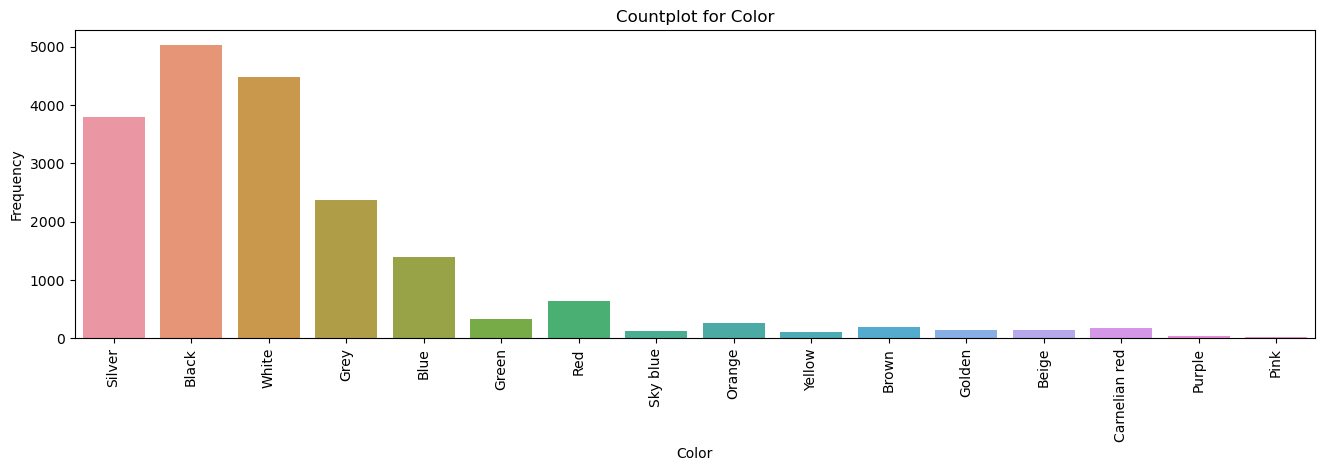

In [27]:
objects = [col for col in data.columns if data[col].dtype == 'O']
for col in data[objects]:
    if col == 'Model':
        continue
    else :
        fig, ax = plt.subplots(figsize=(16, 4))
        sns.countplot(data=data, x=col, ax=ax)
        ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
        ax.set_xlabel(col)
        ax.set_ylabel('Frequency')
        ax.set_title('Countplot for {}'.format(col))
        plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

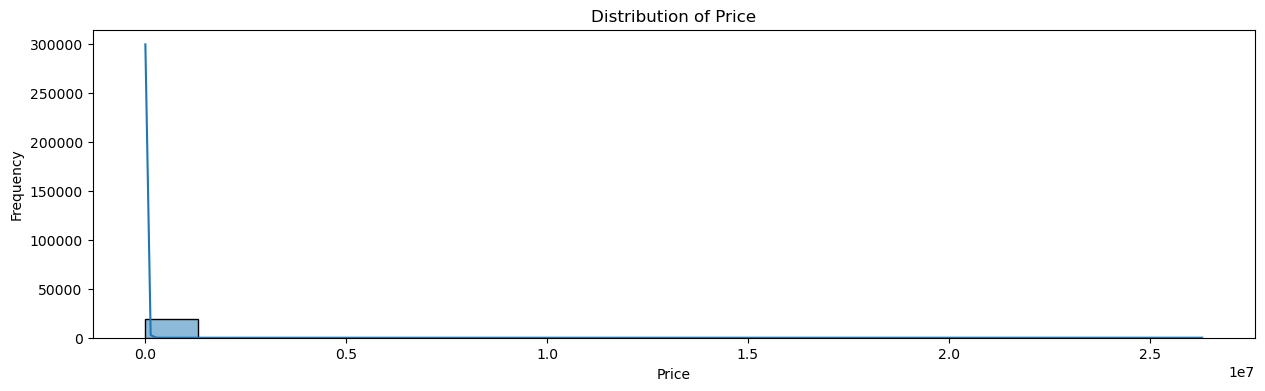

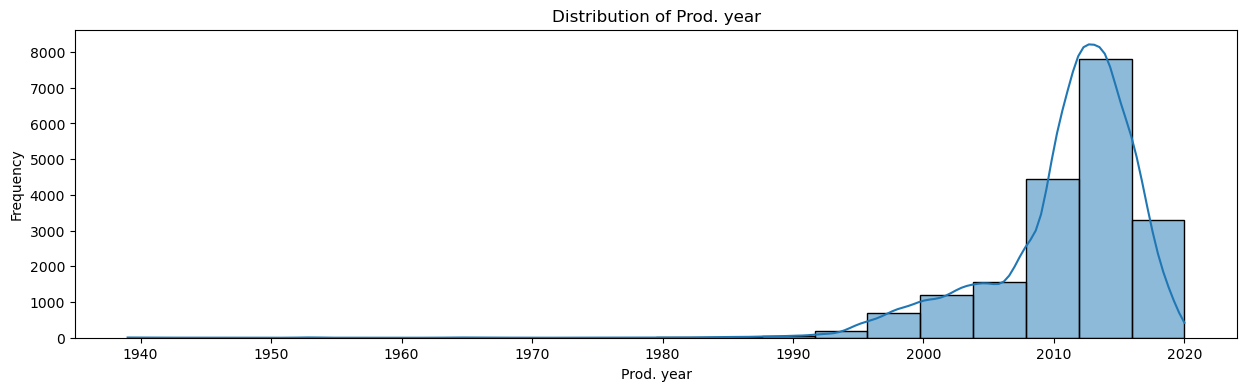

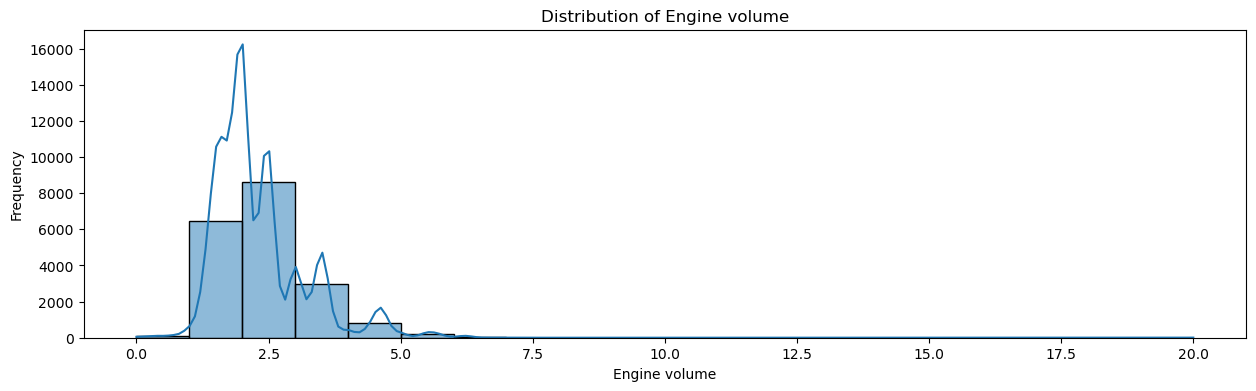

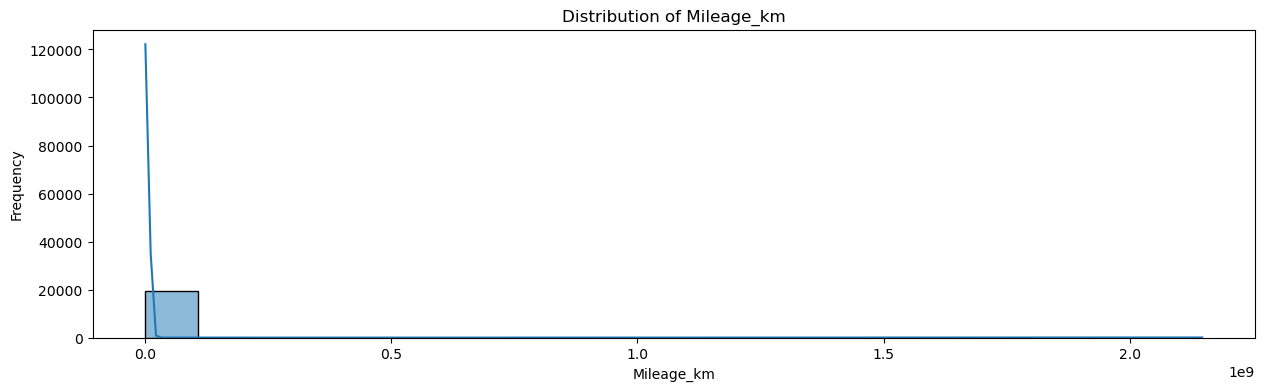

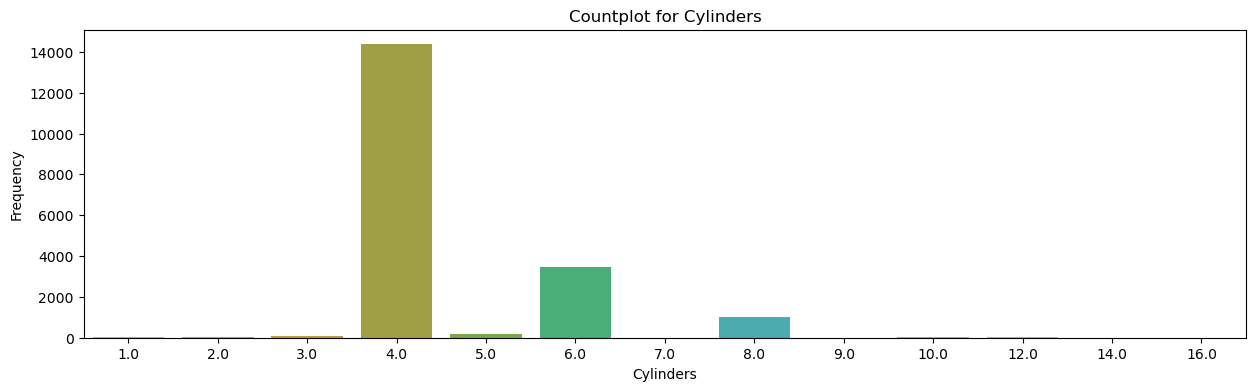

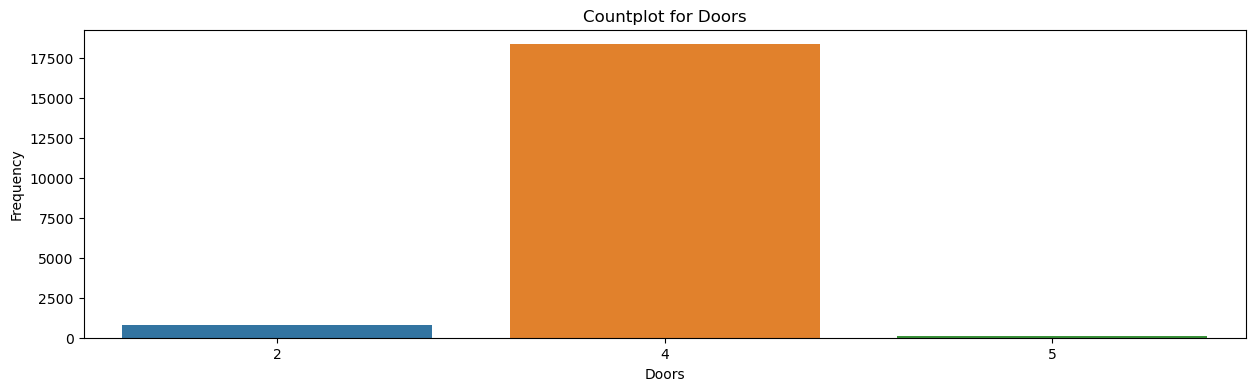

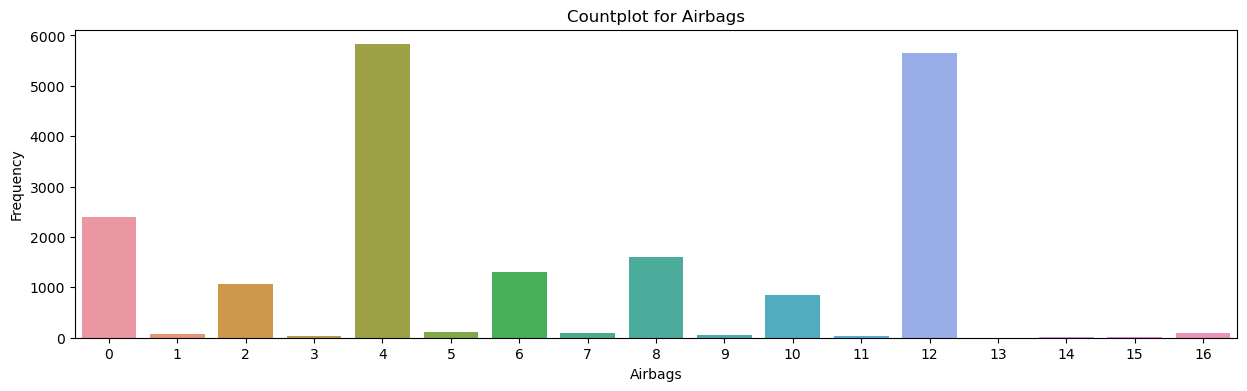

<Figure size 1500x400 with 0 Axes>

In [28]:
numerical_cols = [col for col in data.columns if data[col].dtype in ['int32','int64','float64','float32']]

for col in numerical_cols:
    plt.figure(figsize=(15, 4))
    
    if col == 'Turbo_charged':
        continue
    
    if data[col].nunique() < 20:
        sns.countplot(data=data, x=col)
        plt.title(f'Countplot for {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
    else:
        sns.histplot(data=data, x=col, kde=True, bins=20)
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        
    plt.show

### Handling Outliers

1. Price

2. Prod Year

3. Engine Volume

4. Mileage_km

5. Airbags

In [29]:
cols = ['Price', 'Prod. year', 'Engine volume', 'Mileage_km', 'Airbags']

for col in cols:
    mean_value = data[col].mean()
    median_value = data[col].median()
    max_value = data[col].max()
    min_value = data[col].min()
    std_value = data[col].std()
    percentile_25 = np.percentile(data[col], 25)
    percentile_75 = np.percentile(data[col], 75)
    
    print(f"Column: {col}")
    print(f"Mean: {mean_value}")
    print(f"Max: {max_value}")
    print(f"Min: {min_value}")
    print(f"Standard Deviation: {std_value}")
    print(f"25th Percentile: {percentile_25}")
    print(f"75th Percentile: {percentile_75}")
    print("\n")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Column: Price
Mean: 18555.92722357956
Max: 26307500
Min: 1
Standard Deviation: 190581.26968400902
25th Percentile: 5331.0
75th Percentile: 22075.0




<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Column: Prod. year
Mean: 2010.9128242449447
Max: 2020
Min: 1939
Standard Deviation: 5.668672994387625
25th Percentile: 2009.0
75th Percentile: 2015.0




<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Column: Engine volume
Mean: 2.307989811301139
Max: 20.0
Min: 0.0
Standard Deviation: 0.8778045085021209
25th Percentile: 1.8
75th Percentile: 2.5




<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Column: Mileage_km
Mean: 1532235.68768519
Max: 2147483647
Min: 0
Standard Deviation: 48403869.379290186
25th Percentile: 70139.0
75th Percentile: 188888.0




<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Column: Airbags
Mean: 6.582627228777876
Max: 16
Min: 0
Standard Deviation: 4.3201683949222085
25th Percentile: 4.0
75th Percentile: 12.0




In [30]:
std_threshold = 3

while True:
    mean = data['Mileage_km'].mean()
    std = data['Mileage_km'].std()
    z_scores = np.abs((data['Mileage_km'] - mean) / std)
    outliers = data[z_scores > std_threshold]

    if outliers.empty:
        break 
    else:
        data = data[~data.index.isin(outliers.index)]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [31]:
std_threshold = 3

while True:
    mean = data['Price'].mean()
    std = data['Price'].std()
    z_scores = np.abs((data['Price'] - mean) / std)
    outliers = data[z_scores > std_threshold]

    if outliers.empty:
        break  
    else:
        data = data[~data.index.isin(outliers.index)]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [32]:
std_threshold = 3

while True:
    mean = data['Airbags'].mean()
    std = data['Airbags'].std()
    z_scores = np.abs((data['Airbags'] - mean) / std)
    outliers = data[z_scores > std_threshold]

    if outliers.empty:
        break  
    else:
        data = data[~data.index.isin(outliers.index)]

<IPython.core.display.Javascript object>

In [33]:
std_threshold = 3

while True:
    mean = data['Cylinders'].mean()
    std = data['Cylinders'].std()
    z_scores = np.abs((data['Cylinders'] - mean) / std)
    outliers = data[z_scores > std_threshold]

    if outliers.empty:
        break  
    else:
        data = data[~data.index.isin(outliers.index)]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [34]:
std_threshold = 3

while True:
    mean = data['Engine volume'].mean()
    std = data['Engine volume'].std()
    z_scores = np.abs((data['Engine volume'] - mean) / std)
    outliers = data[z_scores > std_threshold]

    if outliers.empty:
        break  
    else:
        data = data[~data.index.isin(outliers.index)]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [35]:
std_threshold = 3

while True:
    mean = data['Doors'].mean()
    std = data['Doors'].std()
    z_scores = np.abs((data['Doors'] - mean) / std)
    outliers = data[z_scores > std_threshold]

    if outliers.empty:
        break  
    else:
        data = data[~data.index.isin(outliers.index)]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [36]:
std_threshold = 3

while True:
    mean = data['Prod. year'].mean()
    std = data['Prod. year'].std()
    z_scores = np.abs((data['Prod. year'] - mean) / std)
    outliers = data[z_scores > std_threshold]

    if outliers.empty:
        break 
    else:
        data = data[~data.index.isin(outliers.index)]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

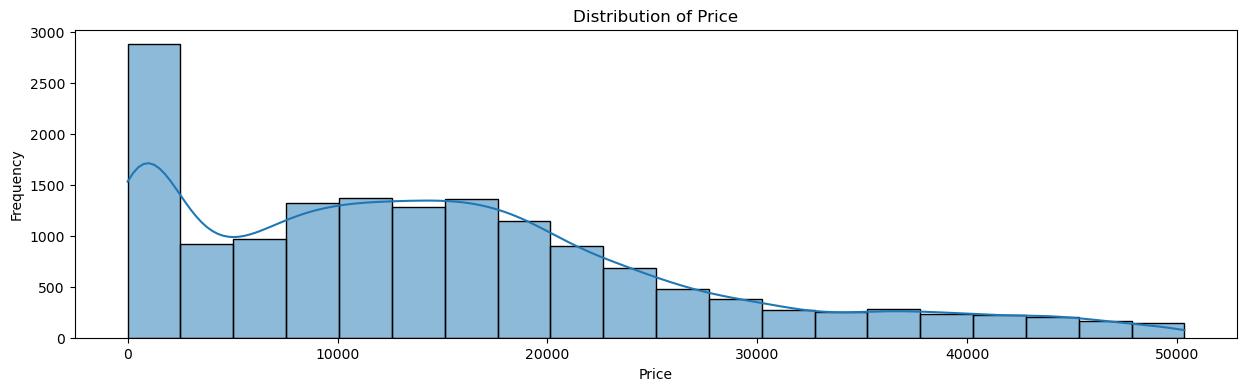

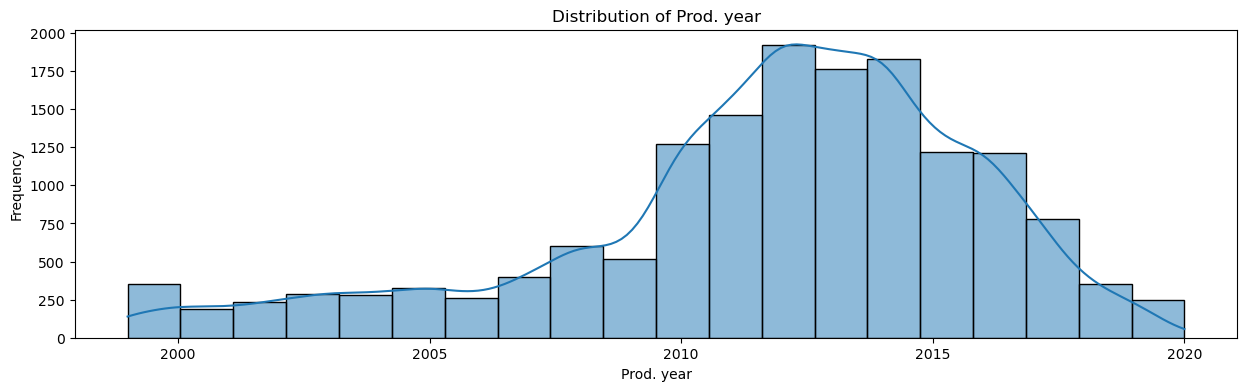

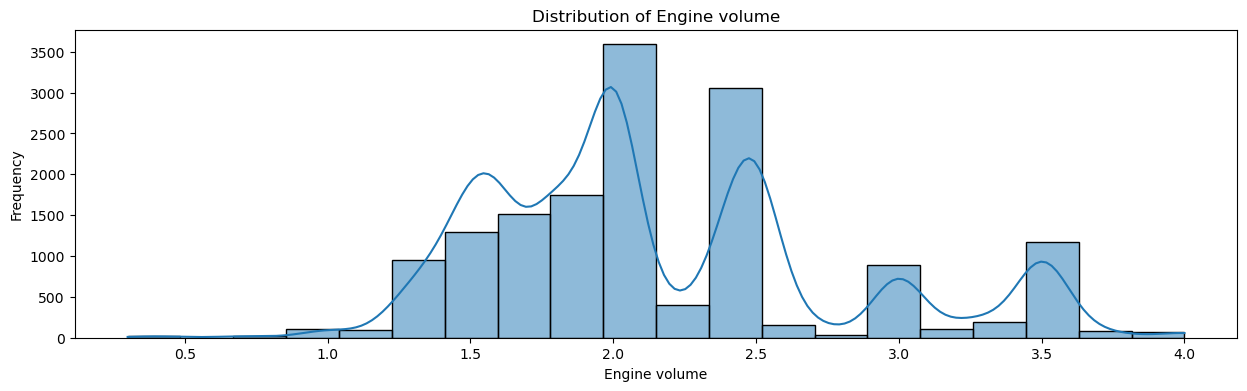

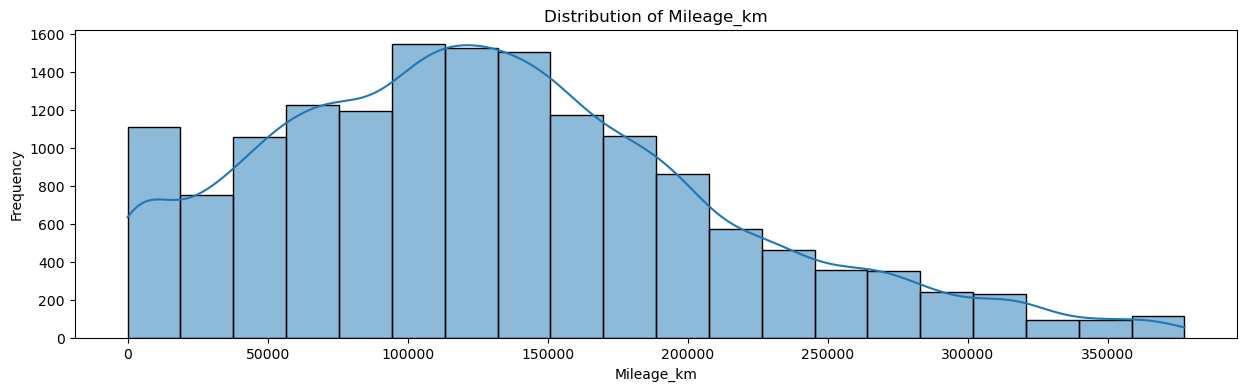

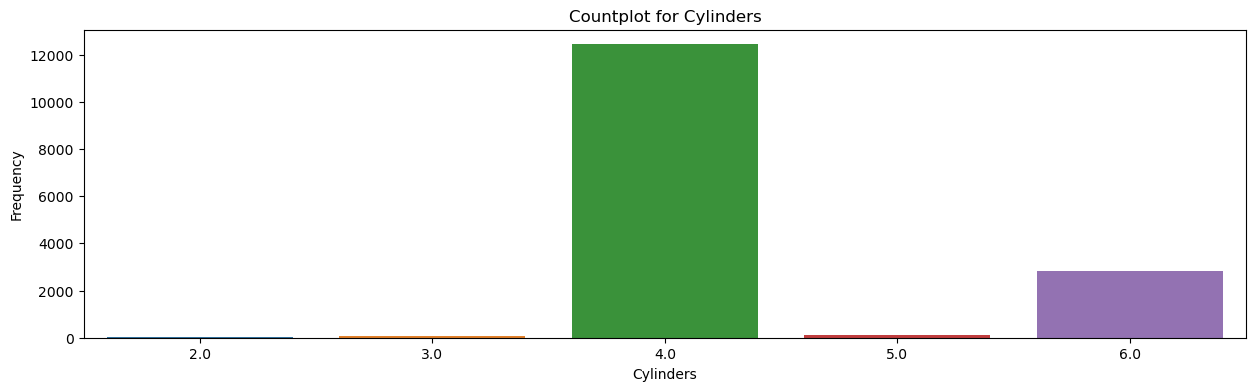

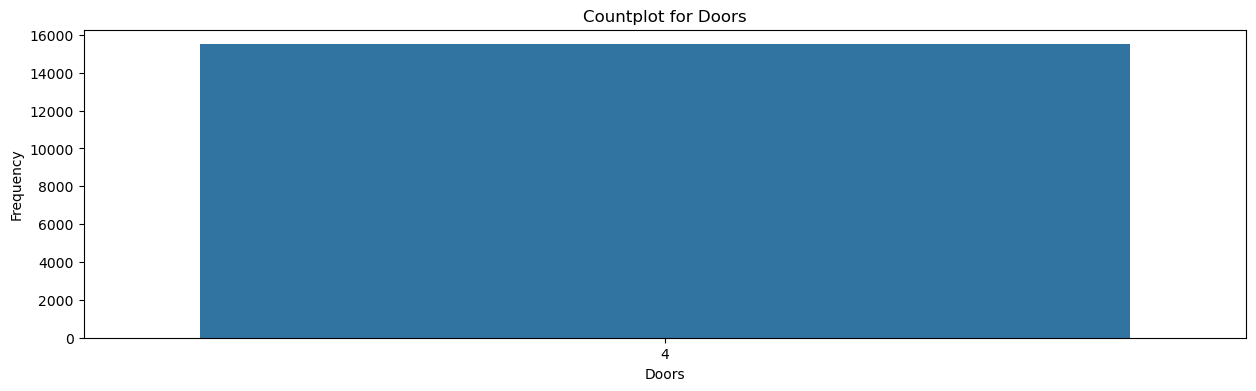

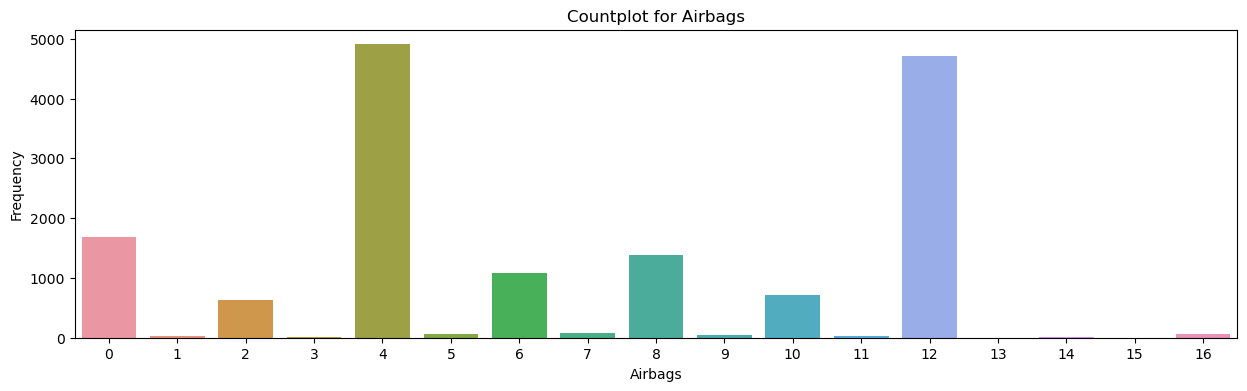

<Figure size 1500x400 with 0 Axes>

In [37]:
numerical_cols = [col for col in data.columns if data[col].dtype in ['int32','int64','float64','float32']]

for col in numerical_cols:
    plt.figure(figsize=(15, 4))
    
    if col == 'Turbo_charged':
        continue
    
    if data[col].nunique() < 20:
        sns.countplot(data=data, x=col)
        plt.title(f'Countplot for {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
    else:
        sns.histplot(data=data, x=col, kde=True, bins=20)
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        
    plt.show

In [38]:
data.head()

,Price,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage_km,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Turbo_charged
0,13328,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005,6.0,Automatic,4x4,4,Left wheel,Silver,12,0
1,16621,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3.0,192000,6.0,Tiptronic,4x4,4,Left wheel,Black,8,0
2,8467,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000,4.0,Variator,Front,4,Right-hand drive,Black,2,0
3,3607,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966,4.0,Automatic,4x4,4,Left wheel,White,0,0
4,11726,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901,4.0,Automatic,Front,4,Left wheel,Silver,4,0


### Hypothesis Testing

###### Certain manufacturers produce cars with higher average prices than others.

In [39]:
import warnings
warnings.filterwarnings('ignore')
luxury_manufacturers = ['BENTLEY', 'ROLLS-ROYCE', 'LAMBORGHINI', 'ASTON MARTIN','FERRARI']

alpha = 0.05

for i in range(len(luxury_manufacturers)):
    for j in range(i+1, len(luxury_manufacturers)):
        manufacturer1 = luxury_manufacturers[i]
        manufacturer2 = luxury_manufacturers[j]

        manufacturer1_data = data[data['Manufacturer'] == manufacturer1]
        manufacturer2_data = data[data['Manufacturer'] == manufacturer2]

        t_stat, p_value = stats.ttest_ind(manufacturer1_data['Price'], manufacturer2_data['Price'])

        if p_value < alpha:
            print(f"Reject the null hypothesis: {manufacturer1} and {manufacturer2} have a significant difference in average prices.")
        else:
            print(f"Fail to reject the null hypothesis: There is no significant difference in average prices between {manufacturer1} and {manufacturer2}.")

<IPython.core.display.Javascript object>

Fail to reject the null hypothesis: There is no significant difference in average prices between BENTLEY and ROLLS-ROYCE.


<IPython.core.display.Javascript object>

Fail to reject the null hypothesis: There is no significant difference in average prices between BENTLEY and LAMBORGHINI.


<IPython.core.display.Javascript object>

Fail to reject the null hypothesis: There is no significant difference in average prices between BENTLEY and ASTON MARTIN.


<IPython.core.display.Javascript object>

Fail to reject the null hypothesis: There is no significant difference in average prices between BENTLEY and FERRARI.


<IPython.core.display.Javascript object>

Fail to reject the null hypothesis: There is no significant difference in average prices between ROLLS-ROYCE and LAMBORGHINI.


<IPython.core.display.Javascript object>

Fail to reject the null hypothesis: There is no significant difference in average prices between ROLLS-ROYCE and ASTON MARTIN.


<IPython.core.display.Javascript object>

Fail to reject the null hypothesis: There is no significant difference in average prices between ROLLS-ROYCE and FERRARI.


<IPython.core.display.Javascript object>

Fail to reject the null hypothesis: There is no significant difference in average prices between LAMBORGHINI and ASTON MARTIN.


<IPython.core.display.Javascript object>

Fail to reject the null hypothesis: There is no significant difference in average prices between LAMBORGHINI and FERRARI.


<IPython.core.display.Javascript object>

Fail to reject the null hypothesis: There is no significant difference in average prices between ASTON MARTIN and FERRARI.


######  Cars with leather interiors have a higher average price compared to cars without leather interiors.

In [40]:
with_leather = data[data['Leather interior'] == 'Yes']
without_leather = data[data['Leather interior'] == 'No']

In [41]:
t_stat, p_value = stats.ttest_ind(with_leather['Price'], without_leather['Price'])

alpha = 0.05

if p_value < alpha:
    print("Reject the null hypothesis: Cars with leather interiors have a higher average price.")
else:
    print("Fail to reject the null hypothesis: No significant difference in average prices.")

<IPython.core.display.Javascript object>

Reject the null hypothesis: Cars with leather interiors have a higher average price.


###### Newer cars (higher production years) have higher average prices than older cars.

In [42]:
cut_off = 2018

new_cars = data[data['Prod. year']>=cut_off]
old_cars = data[data['Prod. year']<cut_off]

t_stat, p_value = stats.ttest_ind(new_cars['Price'],old_cars['Price'])

if p_value < alpha:
    print('Reject the Null Hypothesis: There is a significant difference in average prices between newer and older cars.')
else:
    print('Fail to reject the Null Hypothesis: There is no significant difference in average prices between newer and older cars.')

<IPython.core.display.Javascript object>

Reject the Null Hypothesis: There is a significant difference in average prices between newer and older cars.


###### Cars with a different number of doors have significantly different average prices.

In [43]:
different = data['Doors'].value_counts().idxmin()

different_cars = data[data['Doors'] == different]
common_cars = data[data['Doors'] != different]

t_stat, p_value = stats.ttest_ind(different_cars['Price'],common_cars['Price'])

if p_value < alpha:
    print("Reject the null hypothesis: Cars with different numbers of doors have significantly different average prices.")
else:
    print("Fail to reject the null hypothesis: No significant difference in average prices based on the number of doors.")
    

<IPython.core.display.Javascript object>

Fail to reject the null hypothesis: No significant difference in average prices based on the number of doors.


###### The type of wheel (e.g. Left, Right) is associated with the price of the car.

In [44]:
LHD = data[data['Wheel'] == 'Left Wheel']
RHD = data[data['Wheel'] != 'Left Wheel']

t_stat, p_value = stats.ttest_ind(LHD['Price'],RHD['Price'])

if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in average prices between Left Wheel and other wheel types.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in average prices between Left Wheel and other wheel types.")
    

<IPython.core.display.Javascript object>

Fail to reject the null hypothesis: There is no significant difference in average prices between Left Wheel and other wheel types.


###### Certain car colors are more common for specific categories (e.g., black is more common in luxury cars).


In [45]:
contingency_table = pd.crosstab(data['Color'], data['Category'])

chi2, p_value, _, _ = chi2_contingency(contingency_table)

alpha = 0.05

if p_value < alpha:
    print("Reject the null hypothesis: There is a significant association between car colors and categories.")
else:
    print("Fail to reject the null hypothesis: There is no significant association between car colors and categories.")

<IPython.core.display.Javascript object>

Reject the null hypothesis: There is a significant association between car colors and categories.


###### The number of airbags in a car is positively correlated with its average price.

In [46]:
pearson_corr, p_value = stats.pearsonr(data['Airbags'], data['Price'])

alpha = 0.05

if p_value < alpha:
    print("Reject the null hypothesis: There is a significant positive correlation between the number of airbags and the price.")
else:
    print("Fail to reject the null hypothesis: There is no significant correlation between the number of airbags and the price.")

<IPython.core.display.Javascript object>

Reject the null hypothesis: There is a significant positive correlation between the number of airbags and the price.


######  Certain car colors are more common for specific categories (e.g., black is more)

In [47]:
contingency_table = pd.crosstab(data['Category'], data['Color'])

chi2, p_value, _, _= chi2_contingency(contingency_table)

alpha = 0.05

if p_value < alpha:
    print("Reject the null hypothesis: There is a significant association between car color and car category.")
else:
    print("Fail to reject the null hypothesis: There is no significant association between car color and car category.")

<IPython.core.display.Javascript object>

Reject the null hypothesis: There is a significant association between car color and car category.


###### Cars with turbocharged engines have higher average prices compared to non-turbocharged cars.

In [48]:
turbo_charged = data[data['Turbo_charged']==1]
non_turbo_charged = data[data['Turbo_charged']==0]

t_stat,p_value = stats.ttest_ind(turbo_charged['Price'],non_turbo_charged['Price'])

if p_value < alpha:
    print("Reject the null hypothesis: Cars with turbocharged engines have higher average prices.")
else:
    print("Fail to reject the null hypothesis: No significant difference in average prices.")

<IPython.core.display.Javascript object>

Fail to reject the null hypothesis: No significant difference in average prices.


###### The gear box type is associated with the fuel type of the car (e.g., manual transmission cars are more likely to run on gasoline)

In [49]:
contingency_table = pd.crosstab(data['Gear box type'], data['Fuel type'])

chi2, p_value,  _, _ = chi2_contingency(contingency_table)

alpha = 0.05  # Set your significance level

if p_value < alpha:
    print("Reject the null hypothesis: There is a significant association between Gear box type and Fuel type.")
else:
    print("Fail to reject the null hypothesis: There is no significant association between Gear box type and Fuel type.")

<IPython.core.display.Javascript object>

Reject the null hypothesis: There is a significant association between Gear box type and Fuel type.


## Model Building

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

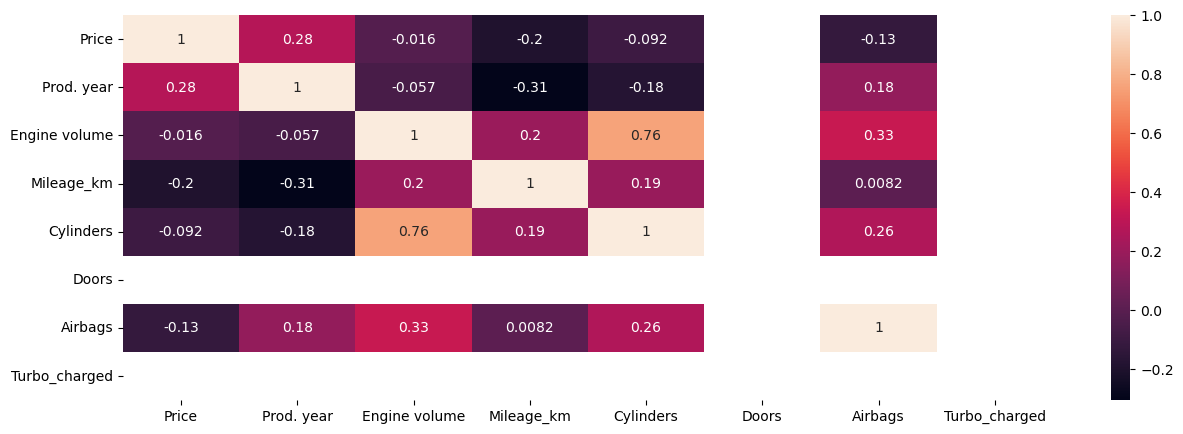

In [50]:
plt.figure(figsize=(15,5))
corr = data[numerical_cols].corr()
sns.heatmap(corr,annot=True)
plt.show()

###### Explanation :

1. Prod. year has a  positive correlation with Price,suggesting that newer cars tend to have higher prices.

2. Engine volume also has a positive correlation with Price,indicating that cars with larger engine volumes tend to have higher prices.

3. Cylinders has a positive correlation with Price,implying that cars with more cylinders may have higher prices.

### Dummies

In [51]:
data.head()

,Price,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage_km,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Turbo_charged
0,13328,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005,6.0,Automatic,4x4,4,Left wheel,Silver,12,0
1,16621,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3.0,192000,6.0,Tiptronic,4x4,4,Left wheel,Black,8,0
2,8467,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000,4.0,Variator,Front,4,Right-hand drive,Black,2,0
3,3607,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966,4.0,Automatic,4x4,4,Left wheel,White,0,0
4,11726,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901,4.0,Automatic,Front,4,Left wheel,Silver,4,0


In [52]:
data.drop(['Model'],axis=1,inplace=True)
data.drop(['Manufacturer'],axis=1,inplace=True)

In [53]:
data['Leather interior'] = data['Leather interior'].apply(lambda x: 1 if x == 'Yes' else 0)

In [54]:
data.head()

,Price,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage_km,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Turbo_charged
0,13328,2010,Jeep,1,Hybrid,3.5,186005,6.0,Automatic,4x4,4,Left wheel,Silver,12,0
1,16621,2011,Jeep,0,Petrol,3.0,192000,6.0,Tiptronic,4x4,4,Left wheel,Black,8,0
2,8467,2006,Hatchback,0,Petrol,1.3,200000,4.0,Variator,Front,4,Right-hand drive,Black,2,0
3,3607,2011,Jeep,1,Hybrid,2.5,168966,4.0,Automatic,4x4,4,Left wheel,White,0,0
4,11726,2014,Hatchback,1,Petrol,1.3,91901,4.0,Automatic,Front,4,Left wheel,Silver,4,0


In [55]:
data1 = pd.get_dummies(data[['Category', 'Fuel type', 'Gear box type', 'Drive wheels', 'Wheel', 'Color']], drop_first=True)

<IPython.core.display.Javascript object>

In [56]:
data = pd.concat([data, data1], axis=1)
data = data.drop(['Category', 'Fuel type', 'Gear box type', 'Drive wheels', 'Wheel', 'Color'], axis=1)
data.head()

<IPython.core.display.Javascript object>

,Price,Prod. year,Leather interior,Engine volume,Mileage_km,Cylinders,Doors,Airbags,Turbo_charged,Category_Coupe,...,Color_Green,Color_Grey,Color_Orange,Color_Pink,Color_Purple,Color_Red,Color_Silver,Color_Sky blue,Color_White,Color_Yellow
0,13328,2010,1,3.5,186005,6.0,4,12,0,False,...,False,False,False,False,False,False,True,False,False,False
1,16621,2011,0,3.0,192000,6.0,4,8,0,False,...,False,False,False,False,False,False,False,False,False,False
2,8467,2006,0,1.3,200000,4.0,4,2,0,False,...,False,False,False,False,False,False,False,False,False,False
3,3607,2011,1,2.5,168966,4.0,4,0,0,False,...,False,False,False,False,False,False,False,False,True,False
4,11726,2014,1,1.3,91901,4.0,4,4,0,False,...,False,False,False,False,False,False,True,False,False,False


In [57]:
data = data.astype(int)
data.head()

,Price,Prod. year,Leather interior,Engine volume,Mileage_km,Cylinders,Doors,Airbags,Turbo_charged,Category_Coupe,...,Color_Green,Color_Grey,Color_Orange,Color_Pink,Color_Purple,Color_Red,Color_Silver,Color_Sky blue,Color_White,Color_Yellow
0,13328,2010,1,3,186005,6,4,12,0,0,...,0,0,0,0,0,0,1,0,0,0
1,16621,2011,0,3,192000,6,4,8,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8467,2006,0,1,200000,4,4,2,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3607,2011,1,2,168966,4,4,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,11726,2014,1,1,91901,4,4,4,0,0,...,0,0,0,0,0,0,1,0,0,0


### Best Model

In [59]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

X = data.drop('Price', axis=1)
y = data['Price']
scaler = MinMaxScaler()

X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

linear_regression = LinearRegression()
ridge_regression = Ridge(alpha=1.0)
lasso_regression = Lasso(alpha=1.0)
random_forest_regressor = RandomForestRegressor(n_estimators=100, random_state=0)
gradient_boosting_regressor = GradientBoostingRegressor(n_estimators=100, random_state=0)

models = [linear_regression, ridge_regression, lasso_regression, 
          random_forest_regressor, gradient_boosting_regressor]

for model in models:
    model.fit(X_train, y_train)  

    y_pred = model.predict(X_test)  

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"Model: {model.__class__.__name__}")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"R-squared (R2) Score: {r2}")
    print("="*40)

Model: LinearRegression
Mean Squared Error (MSE): 94722745.5178827
R-squared (R2) Score: 0.3267035478197583
Model: Ridge
Mean Squared Error (MSE): 94713278.55186011
R-squared (R2) Score: 0.32677083973154863
Model: Lasso
Mean Squared Error (MSE): 94701046.04268117
R-squared (R2) Score: 0.3268577893336364
Model: RandomForestRegressor
Mean Squared Error (MSE): 39386136.91848774
R-squared (R2) Score: 0.7200403545387459
Model: GradientBoostingRegressor
Mean Squared Error (MSE): 57116357.55529056
R-squared (R2) Score: 0.5940126028528689


### Random Forest Regressor

In [60]:
from sklearn.ensemble import RandomForestRegressor

# Assuming you have already loaded and preprocessed your data

# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit a RandomForestRegressor (or any other chosen model)
model = RandomForestRegressor(n_estimators=100, random_state=0)
model.fit(X_train, y_train)

# Use the model to predict the target variable for the test data
y_pred = model.predict(X_test)

In [61]:
y_pred

array([19488.02 ,  8361.89 , 28029.7  , ..., 19950.05 , 40687.54 ,
        3641.635])

### RFE

In [62]:
from sklearn.feature_selection import RFE
model = RandomForestRegressor()
rfe = RFE(estimator=model, n_features_to_select=10) 
rfe.fit(X_train, y_train)
selected_features = X_train.columns[rfe.support_]
print("Selected Features:")
print(selected_features)

Selected Features:
Index(['Prod. year', 'Leather interior', 'Engine volume', 'Mileage_km',
       'Cylinders', 'Airbags', 'Category_Sedan', 'Fuel type_Diesel',
       'Gear box type_Tiptronic', 'Drive wheels_Front'],
      dtype='object')


### r2 Score

In [63]:
from sklearn.metrics import r2_score

random_forest_regressor = RandomForestRegressor(n_estimators=100, random_state=0)

X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

random_forest_regressor.fit(X_train_selected, y_train)

y_pred = random_forest_regressor.predict(X_test_selected)

r2 = r2_score(y_test, y_pred)
print(f"R-squared (R2) Score: {r2}")

R-squared (R2) Score: 0.683990287211234


### Predicting Price  

In [73]:
X = data[['Prod. year', 'Leather interior', 'Engine volume', 'Mileage_km',
          'Cylinders', 'Airbags', 'Category_Sedan', 'Fuel type_Diesel',
          'Gear box type_Tiptronic', 'Drive wheels_Front']]
y = data['Price']

regressor = RandomForestRegressor(n_estimators=100, random_state=0)
regressor.fit(X, y)

prod_year = int(input("Enter Production Year: "))
leather_interior = int(input("Enter 1 for Leather Interior, 0 for No Leather Interior: "))
engine_volume = float(input("Enter Engine Volume: "))
mileage_km = int(input("Enter Mileage in Kilometers: "))
cylinders = int(input("Enter Number of Cylinders: "))
airbags = int(input("Enter Number of Airbags: "))
category_sedan = int(input("Enter 1 for Sedan, 0 for other category: "))
fuel_type_diesel = int(input("Enter 1 for Diesel, 0 for other Fuel Type: "))
gear_box_type_tiptronic = int(input("Enter 1 for Tiptronic Gear Box, 0 for other Gear Box Type: "))
drive_wheels_front = int(input("Enter 1 for Front Wheel Drive, 0 for other Drive Wheels: "))

new_data = [[prod_year, leather_interior, engine_volume, mileage_km, cylinders,
             airbags, category_sedan, fuel_type_diesel, gear_box_type_tiptronic,
             drive_wheels_front]]

predicted = regressor.predict(new_data)

print(f"\n Predicted Price: {predicted[0]}")

Enter Production Year: 2020
Enter 1 for Leather Interior, 0 for No Leather Interior: 1
Enter Engine Volume: 3.5
Enter Mileage in Kilometers: 200000
Enter Number of Cylinders: 6
Enter Number of Airbags: 8
Enter 1 for Sedan, 0 for other category: 1
Enter 1 for Diesel, 0 for other Fuel Type: 0
Enter 1 for Tiptronic Gear Box, 0 for other Gear Box Type: 0
Enter 1 for Front Wheel Drive, 0 for other Drive Wheels: 1

 Predicted Price: 26199.33
